In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [53]:
# Load the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255., x_test/255.

print('x_train.shape: ', x_train.shape)

x_train.shape:  (60000, 28, 28)


In [54]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [55]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [56]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 897us/step - loss: 0.4787 - accuracy: 0.8611 - val_loss: 0.1334 - val_accuracy: 0.9607
Epoch 2/10
1875/1875 [==============================] - 2s 928us/step - loss: 0.1483 - accuracy: 0.9556 - val_loss: 0.0972 - val_accuracy: 0.9705
Epoch 3/10
1875/1875 [==============================] - 1s 786us/step - loss: 0.1063 - accuracy: 0.9681 - val_loss: 0.0884 - val_accuracy: 0.9719
Epoch 4/10
1875/1875 [==============================] - 1s 769us/step - loss: 0.0851 - accuracy: 0.9732 - val_loss: 0.0761 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 1s 786us/step - loss: 0.0703 - accuracy: 0.9783 - val_loss: 0.0729 - val_accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 1s 765us/step - loss: 0.0608 - accuracy: 0.9812 - val_loss: 0.0700 - val_accuracy: 0.9768
Epoch 7/10
1875/1875 [==============================] - 1s 772us/step - loss: 0.0567 - accuracy: 0.9827 - val_loss: 0.0652 -

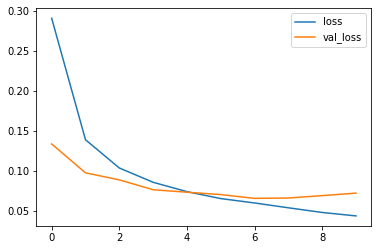

In [57]:
# Plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss') # val == validation
plt.legend()

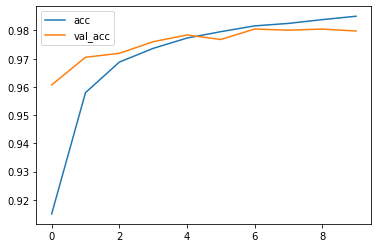

In [58]:
# Plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [59]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 489us/step - loss: 0.0718 - accuracy: 0.9798
[0.07179716229438782, 0.9797999858856201]


Confusion matrix without normalization
[[ 971    0    1    2    1    2    0    1    1    1]
 [   0 1124    3    1    0    1    2    0    4    0]
 [   3    1 1013    4    2    0    1    4    4    0]
 [   0    0    3  989    0    5    0    4    5    4]
 [   0    0    2    0  964    0    5    0    3    8]
 [   3    0    0    9    1  873    2    0    3    1]
 [   5    2    1    0    6    9  931    0    4    0]
 [   2    6    7    5    0    0    0  999    2    7]
 [   3    0    2    0    4    4    0    4  956    1]
 [   1    4    0    5    7    3    0    5    6  978]]


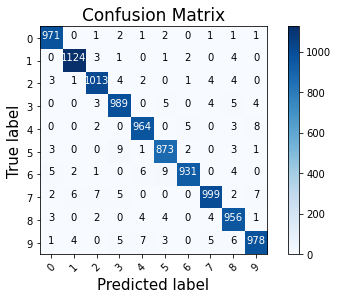

In [94]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):

    
    # This function prints and plots the confusion matrix.
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
        
    else:
        print('Confusion matrix without normalization')
        
    print(cm)
    
    plt.figure()#figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=17)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.xlabel('Predicted label', fontsize=15)
    plt.ylabel('True label', fontsize=15)
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# tf.math.confusion_matrix(
#     labels, predictions, num_classes=None, weights=None, dtype=tf.dtypes.int32,
#     name=None
# )


Text(0.5, 1.0, 'True label: 4 Predicted: 9')

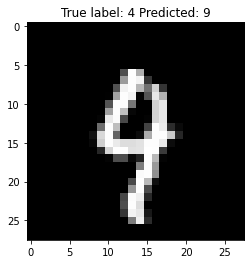

In [98]:
# Show some miscalssified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' % (y_test[i], p_test[i]))